In [1]:
import zipfile

zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

# List the folders and files
folders = set()
for file in file_list:
    components = file.split('/')
    if len(components) > 1:
        folders.add(components[0])

print("Folders in the zip file:")
for folder in folders:
    print(folder)


Folders in the zip file:
vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0


In [2]:
import zipfile

zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'
target_folder = 'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

# List the folders within the specified folder
folders = set()
for file in file_list:
    if file.startswith(target_folder + '/'):
        components = file[len(target_folder):].split('/')
        if len(components) > 1:
            folders.add(components[1])

print(f"Folders inside '{target_folder}' in the zip file:")
for folder in folders:
    print(folder)


Folders inside 'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0' in the zip file:
SHA256SUMS.txt
metadata.csv
images
breast-level_annotations.csv
LICENSE.txt
finding_annotations.csv


In [3]:
import zipfile
import pandas as pd

zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'
target_folder = 'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0'
csv_file_name = 'finding_annotations.csv'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Check if the CSV file exists in the archive
    if target_folder + '/' + csv_file_name in zip_ref.namelist():
        with zip_ref.open(target_folder + '/' + csv_file_name) as file:
            data_final = pd.read_csv(file)
            print(f"Contents of '{csv_file_name}':")
            print(data_final)
    else:
        print(f"'{csv_file_name}' not found in the zip file.")

Contents of 'finding_annotations.csv':
                               study_id                         series_id  \
0      48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
1      48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
2      75e8e48933289d70b407379a564f8594  853b70e7e6f39133497909d9ca4c756d   
3      75e8e48933289d70b407379a564f8594  853b70e7e6f39133497909d9ca4c756d   
4      c3487424fee1bdd4515b72dc3fd69813  77619c914263eae44e9099f1ce07192c   
...                                 ...                               ...   
20481  f2093a752e6b44df5990f5fd38c99dd2  2b1b2b8f48abab9819c0b3d091e152ee   
20482  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20483  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20484  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   
20485  b3c8969cd2accfa4dbb2aece1f7158ab  69d7f07ea04572dad5e5aa62fbcfc4b7   

                               image

In [4]:
# Add a new column "classification" based on "breast_birads"
data_final['classification'] = data_final['breast_birads'].apply(lambda x: 'Malignant' if x in ['BI-RADS 4', 'BI-RADS 5'] else 'Benign')

# Drop rows with "BI-RADS 3" in the "breast_birads" column
data_final = data_final[data_final['breast_birads'] != 'BI-RADS 3']

# Display the updated DataFrame
print(data_final.head(3))


                           study_id                         series_id  \
0  48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
1  48575a27b7c992427041a82fa750d3fa  26de4993fa6b8ae50a91c8baf49b92b0   
4  c3487424fee1bdd4515b72dc3fd69813  77619c914263eae44e9099f1ce07192c   

                           image_id laterality view_position  height  width  \
0  4e3a578fe535ea4f5258d3f7f4419db8          R            CC    3518   2800   
1  dac39351b0f3a8c670b7f8dc88029364          R           MLO    3518   2800   
4  318264c881bf12f2c1efe5f93920cc37          R            CC    3518   2800   

  breast_birads breast_density            finding_categories finding_birads  \
0     BI-RADS 4      DENSITY C                      ['Mass']      BI-RADS 4   
1     BI-RADS 4      DENSITY C                      ['Mass']      BI-RADS 4   
4     BI-RADS 4      DENSITY C  ['Architectural Distortion']      BI-RADS 4   

          xmin         ymin         xmax         ymax     split classific

In [39]:
data_final.columns

Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density',
       'finding_categories', 'finding_birads', 'xmin', 'ymin', 'xmax', 'ymax',
       'split', 'classification'],
      dtype='object')

In [5]:
# Display the total number of "Malignant" and "Benign" cases
classification_counts = data_final['classification'].value_counts()
print(classification_counts)


classification
Benign       18082
Malignant     1432
Name: count, dtype: int64


Study ID: 48575a27b7c992427041a82fa750d3fa, Image ID: 4e3a578fe535ea4f5258d3f7f4419db8


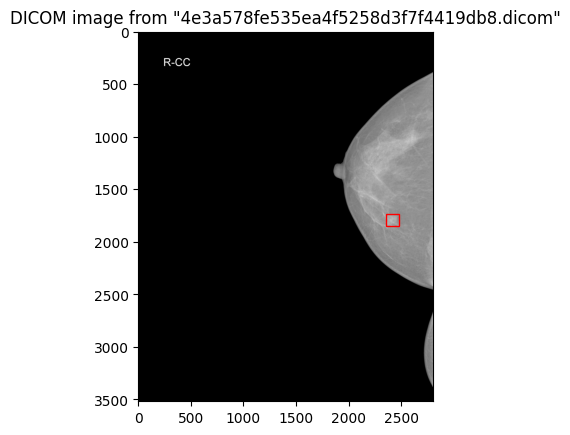

Study ID: 48575a27b7c992427041a82fa750d3fa, Image ID: dac39351b0f3a8c670b7f8dc88029364
Study ID: c3487424fee1bdd4515b72dc3fd69813, Image ID: 318264c881bf12f2c1efe5f93920cc37
Study ID: c3487424fee1bdd4515b72dc3fd69813, Image ID: adf961b5379855af0293ca526f3d0c51
Study ID: 7c51789da6c462e55bcb95c2a7d437ee, Image ID: f581ef53bb7e61f4575db33eceac8ff8


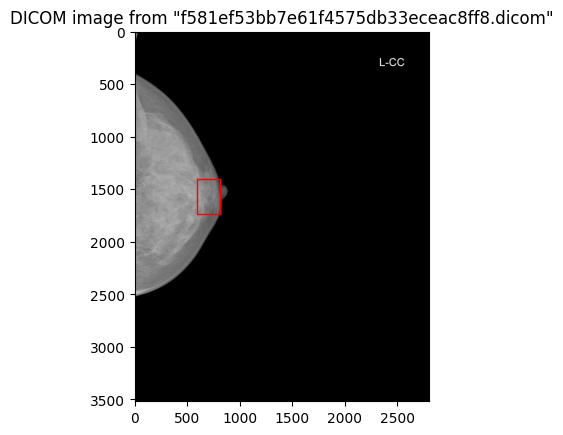

Study ID: 7c51789da6c462e55bcb95c2a7d437ee, Image ID: 1142cdfbfe725d62038252693cf064e5
Study ID: 57674c2def92287668ed5bc51092fbef, Image ID: dc4694b543793f89c7003f4d52adbbcb


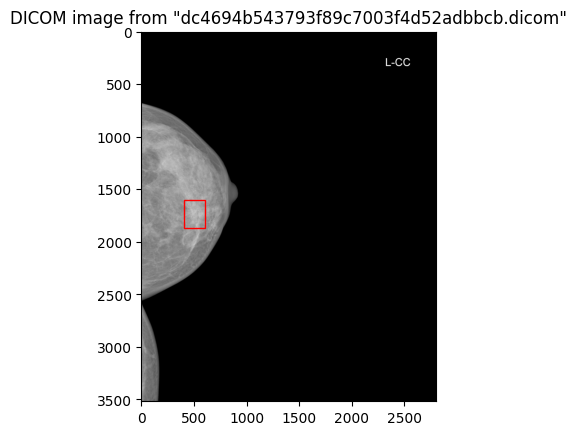

Study ID: 57674c2def92287668ed5bc51092fbef, Image ID: dc4694b543793f89c7003f4d52adbbcb


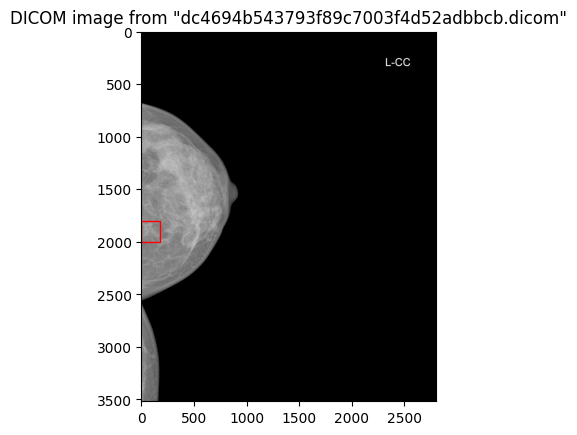

Study ID: 57674c2def92287668ed5bc51092fbef, Image ID: 040cc172596bded4092c44094dc33fb7
Study ID: 57674c2def92287668ed5bc51092fbef, Image ID: 040cc172596bded4092c44094dc33fb7
Study ID: 31fa226bc9f87e0a2cb2de6dddbc2270, Image ID: 625aa350502a7038cfe5f9ca5f1a65f4
Study ID: e233b75f7dc52e0ea37c88ad1c4df17d, Image ID: 8c799782afb5ab3a1a9cd5236dbddb98
Study ID: e233b75f7dc52e0ea37c88ad1c4df17d, Image ID: a869427ece4cb34d43825be65705929b
Study ID: e49d8e95ce75cfec372ac63495490225, Image ID: 019b9f6365fa641db040b5b643fadc42


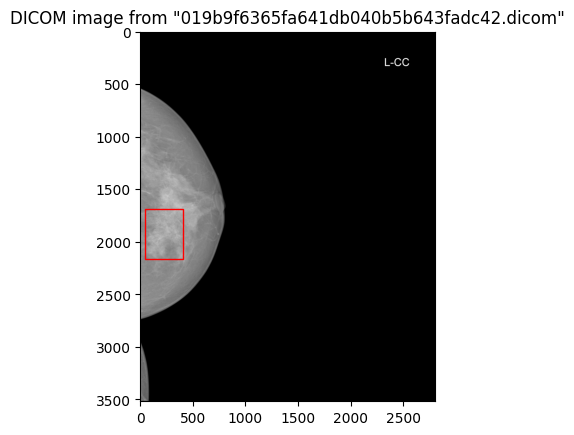

Study ID: e49d8e95ce75cfec372ac63495490225, Image ID: c7c60c6a527a217dd3f4f508a6305556
Study ID: 752493f24f84d27d401d070709d176ab, Image ID: 41040a367358df02680bc6ce2ab7475b
Study ID: fda9ea98f65af22d698f4c0110d46e10, Image ID: 17c9d5489c19c75ed3cb4032ba49afb7
Study ID: fda9ea98f65af22d698f4c0110d46e10, Image ID: b9f3c7402b190c39344e31c20797851c
Study ID: 540ab71b28752c3e279be9bad638df79, Image ID: f2d214b69a7661d43e755f8921706206
Study ID: 540ab71b28752c3e279be9bad638df79, Image ID: 0adb22b2b24d61c511acbe028648532e
Study ID: b57b97020df361371ae1877080433275, Image ID: 5fe8350c930a08ebc532cbb304f5642a
Study ID: b57b97020df361371ae1877080433275, Image ID: 5fe8350c930a08ebc532cbb304f5642a
Study ID: b57b97020df361371ae1877080433275, Image ID: 5fe8350c930a08ebc532cbb304f5642a
Study ID: b57b97020df361371ae1877080433275, Image ID: 7a6c57ce6034053ca02a8cd32549db7f
Study ID: b57b97020df361371ae1877080433275, Image ID: 7a6c57ce6034053ca02a8cd32549db7f
Study ID: 6a77274d2391c35e0e4fcd8dbba32088,

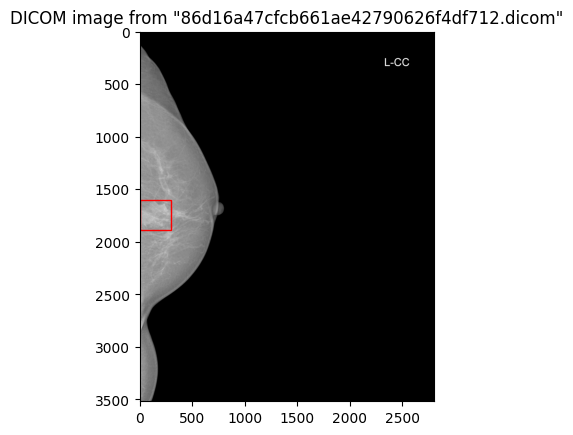

Study ID: 6a77274d2391c35e0e4fcd8dbba32088, Image ID: f824ca07593cb971f4d2348de8def504
Study ID: b7e4e3564d6a1e087343250e95f38ff4, Image ID: 96cbdda19cf07be8e00db80d3c076e3c
Study ID: b7e4e3564d6a1e087343250e95f38ff4, Image ID: 8ccbc18df717a107769beedde21a14a3
Study ID: c7360c6740dcbe8491216ada6ae8b2a0, Image ID: dce7898554efd8b922dd5425d828db8d
Study ID: c7360c6740dcbe8491216ada6ae8b2a0, Image ID: a3214c506a005b639b4d720de9cea847
Study ID: eaffca1d93f249b54f4dfb6620060fb5, Image ID: 87f492b1ef0b4090691311a40b81da6f
Study ID: eaffca1d93f249b54f4dfb6620060fb5, Image ID: 91f8118d5aad4eaa03d93e7c125ef241
Study ID: 66a1867c10dc043ac2d6fdb76bef9115, Image ID: de271f535b0d9c01a793d9ed2db5708d


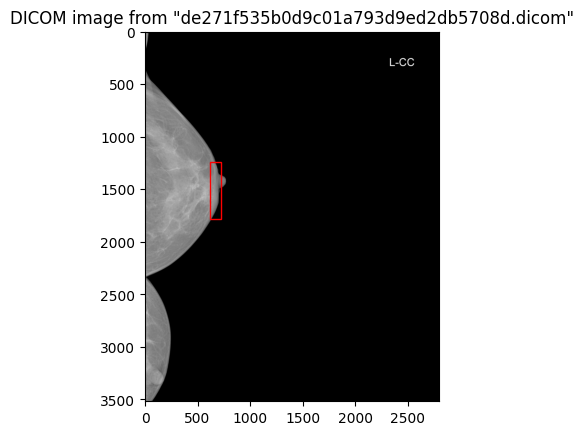

Study ID: 66a1867c10dc043ac2d6fdb76bef9115, Image ID: de271f535b0d9c01a793d9ed2db5708d


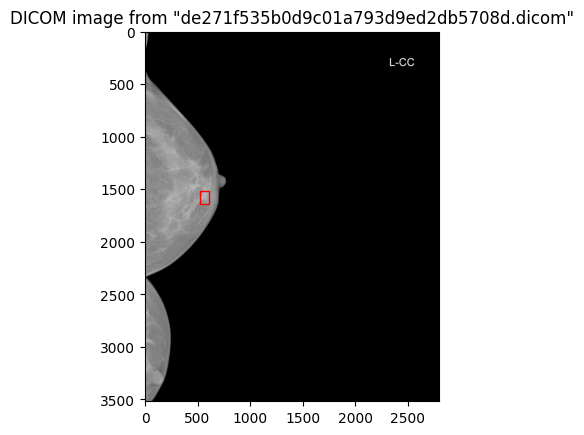

Study ID: 66a1867c10dc043ac2d6fdb76bef9115, Image ID: deed2f0fda8f17fde773fe8087f5c5ae
Study ID: 66a1867c10dc043ac2d6fdb76bef9115, Image ID: deed2f0fda8f17fde773fe8087f5c5ae
Study ID: 20a0367e9d07c9d5b8cd11f51c4d4784, Image ID: 99f5d42f781a68bf912189a86e6503d9


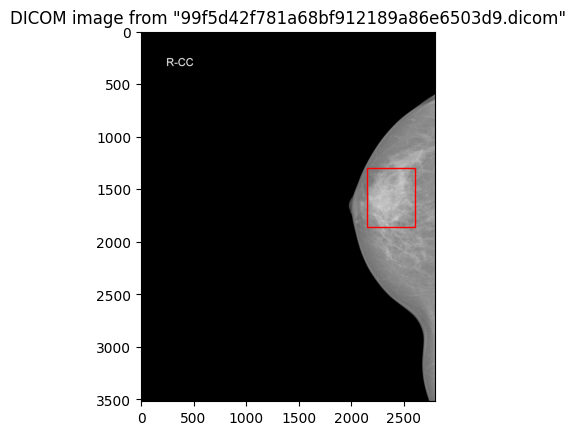

Study ID: 20a0367e9d07c9d5b8cd11f51c4d4784, Image ID: 005918369ec07b1aed37d1dd78bc57fe
Study ID: 0f0551f4edb5494b0d8765c23fe421ae, Image ID: a37e508fc994c1c7a846ec23edfb400f
Study ID: 50a8bfda39adc93f22a174153632b823, Image ID: 0a6f0eac805822cd00f3c25ba99569e8
Study ID: 50a8bfda39adc93f22a174153632b823, Image ID: 648040dd50a48c66b4819c38536668ef
Study ID: e22442ff5a7632d5fc91d2715319b448, Image ID: 467ef88ae1ce2bf8a5f28c36c20bd9d0


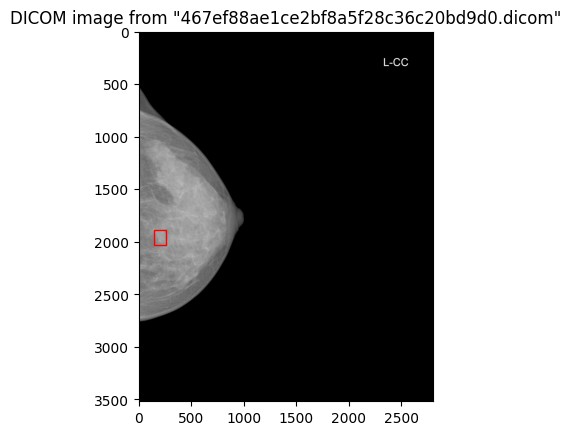

Study ID: e22442ff5a7632d5fc91d2715319b448, Image ID: d360a682c40590bb09f819d127e0a11a


KeyboardInterrupt: 

In [146]:
import zipfile
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Define the path to the ZIP file
zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'

# Function to load and display DICOM images with bounding boxes based on study_id and image_id
def load_and_display_dicom_image_with_bbox(zip_file_path, study_id, image_id, xmin, ymin, xmax, ymax):
    # Load the DICOM image from the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{study_id}/{image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Check if the image is malignant and does not have a white background
    if row['classification'] == 'Malignant' and ds.pixel_array.mean() < 200:  # Adjust the threshold as needed
        # Display the DICOM image with bounding box
        plt.imshow(ds.pixel_array, cmap='gray')
        plt.title(f'DICOM image from "{image_id}.dicom"')

        # Overlay bounding box on the image
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        plt.show()

# Assuming 'data_final' is your DataFrame containing bounding box details
for index, row in data_final.iterrows():
    print(f"Study ID: {row['study_id']}, Image ID: {row['image_id']}")
    load_and_display_dicom_image_with_bbox(zip_file_path, row['study_id'], row['image_id'], row['xmin'], row['ymin'], row['xmax'], row['ymax'])


In [6]:
# Assuming your DataFrame is named 'data_final'
negative_values_count = (data_final['xmin'] < 0).sum() + (data_final['xmax'] < 0).sum() + (data_final['ymin'] < 0).sum() + (data_final['ymax'] < 0).sum()

# Display the total count of rows with negative values in 'xmin', 'xmax', 'ymin', and 'ymax'
print("Total count of rows with negative values:", negative_values_count)


Total count of rows with negative values: 15


In [7]:
import pandas as pd

# Assuming your DataFrame is named 'data_final'
negative_rows = data_final[(data_final['xmin'] < 0) | (data_final['xmax'] < 0) | (data_final['ymin'] < 0) | (data_final['ymax'] < 0)]

# Display the study_id, image_id, xmin, xmax, ymin, and ymax of rows with negative values
negative_values_df = negative_rows[['study_id', 'image_id', 'xmin', 'xmax', 'ymin', 'ymax']]
print("DataFrame with rows containing negative values:")
print(negative_values_df)


DataFrame with rows containing negative values:
                              study_id                          image_id  \
15    57674c2def92287668ed5bc51092fbef  dc4694b543793f89c7003f4d52adbbcb   
419   bcb0736132d431b4b79b564afbb3fa8d  63fc9a74c6faa9ea7a869fe657201e70   
569   c38f7f72e375edbd288ae100764baeb3  7cbfcf34be7198528dde3e9d159df4a0   
816   9047f2eb0cda80c277bd169d6d240810  0bac94530476031873566b909b8f1161   
958   e39602b13a9eea13c99888f2f47cc77f  15ad456e4bc707e7ffeee20e60a3a820   
1052  81885e37a9a42bd351516b83bc3f6d66  6e0cfd8cdae637f4613868dbbc34b453   
1219  9355c6b80ab80257f1c99ec644a5798e  87207460ecda3b86f570e495a65cef48   
1547  7047eb7f28a47d9f5fee20a6b1e10954  1fa586cd078894845bf4a1648232cde7   
1617  b63e091fc26f23aa4d60c109c4ea007a  4a29dbe9d326db4d304b619ac9b8d10d   
1620  b63e091fc26f23aa4d60c109c4ea007a  1e074d67076ab3ccbcb6fabb7a93e479   
1695  ae4b6f49514c32216a8aabb4b3ad026a  16772df2fc68173354ed7b5684e40a56   
1871  dc8eca8e41cb72804147da33e91917bb  

Study ID: 57674c2def92287668ed5bc51092fbef, Image ID: dc4694b543793f89c7003f4d52adbbcb


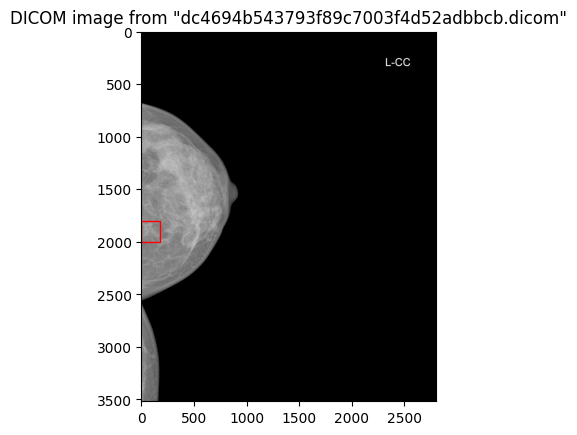

Study ID: bcb0736132d431b4b79b564afbb3fa8d, Image ID: 63fc9a74c6faa9ea7a869fe657201e70


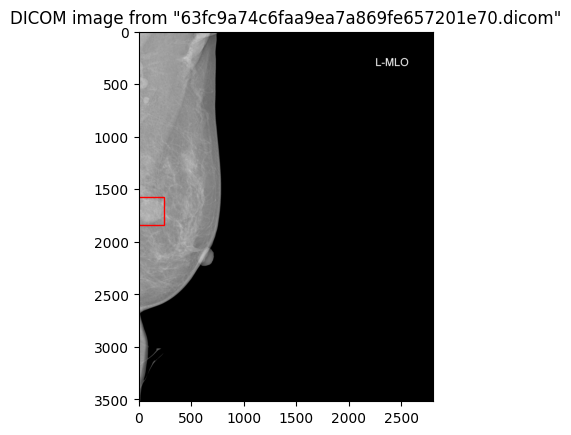

Study ID: c38f7f72e375edbd288ae100764baeb3, Image ID: 7cbfcf34be7198528dde3e9d159df4a0


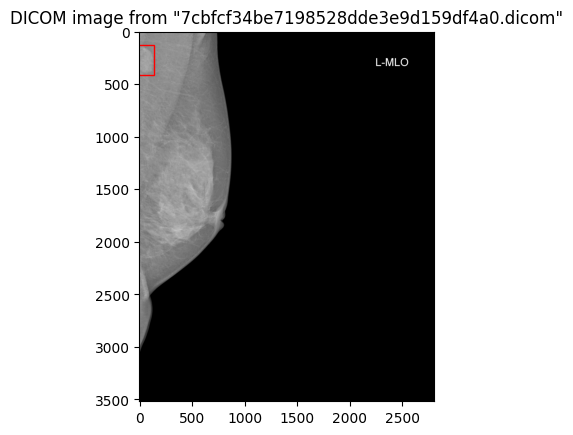

Study ID: 9047f2eb0cda80c277bd169d6d240810, Image ID: 0bac94530476031873566b909b8f1161


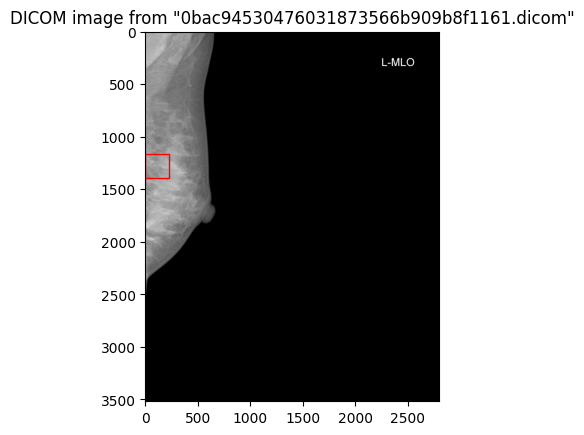

Study ID: e39602b13a9eea13c99888f2f47cc77f, Image ID: 15ad456e4bc707e7ffeee20e60a3a820


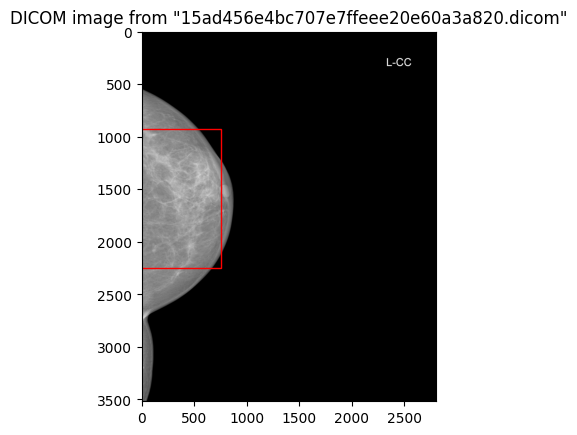

Study ID: 81885e37a9a42bd351516b83bc3f6d66, Image ID: 6e0cfd8cdae637f4613868dbbc34b453


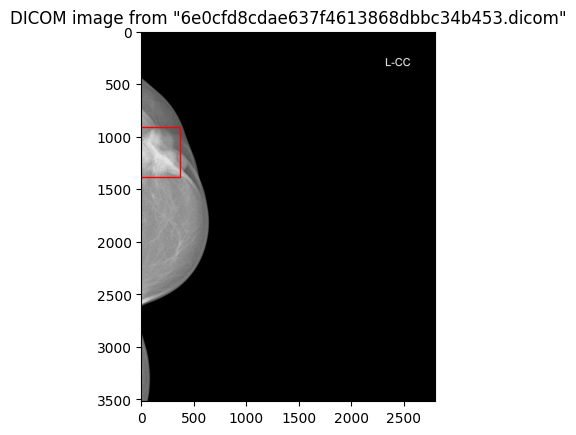

Study ID: 9355c6b80ab80257f1c99ec644a5798e, Image ID: 87207460ecda3b86f570e495a65cef48


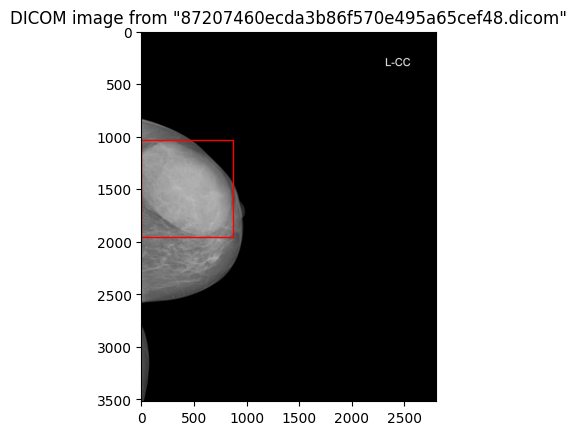

Study ID: 7047eb7f28a47d9f5fee20a6b1e10954, Image ID: 1fa586cd078894845bf4a1648232cde7


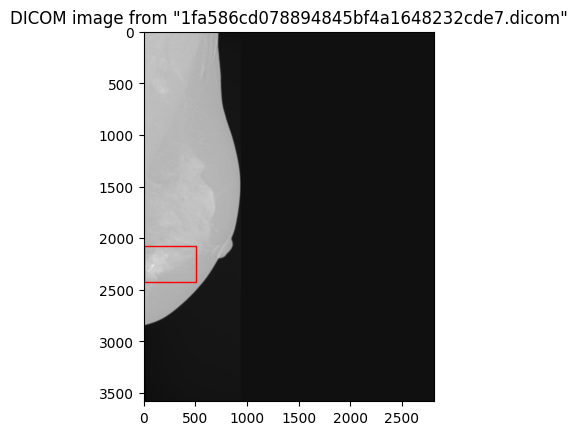

Study ID: b63e091fc26f23aa4d60c109c4ea007a, Image ID: 4a29dbe9d326db4d304b619ac9b8d10d


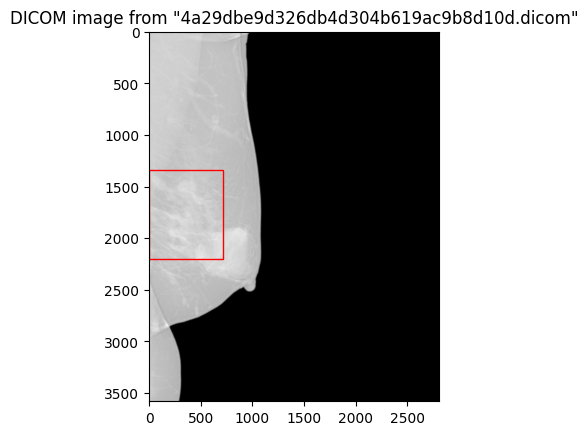

Study ID: b63e091fc26f23aa4d60c109c4ea007a, Image ID: 1e074d67076ab3ccbcb6fabb7a93e479


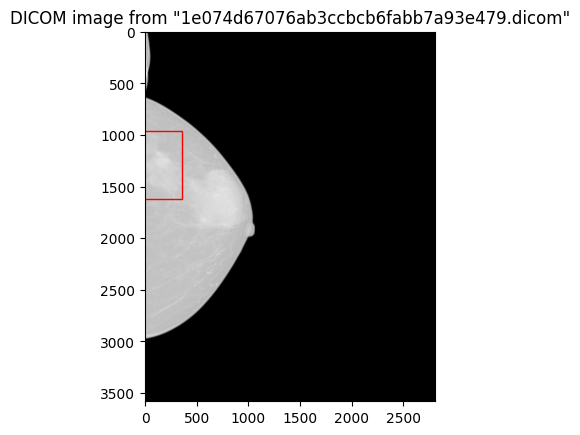

Study ID: ae4b6f49514c32216a8aabb4b3ad026a, Image ID: 16772df2fc68173354ed7b5684e40a56


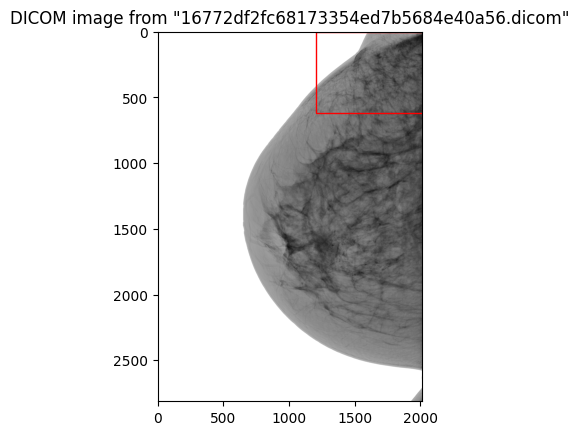

Study ID: dc8eca8e41cb72804147da33e91917bb, Image ID: 06a407691cadae64cea5de8e8634a4ac


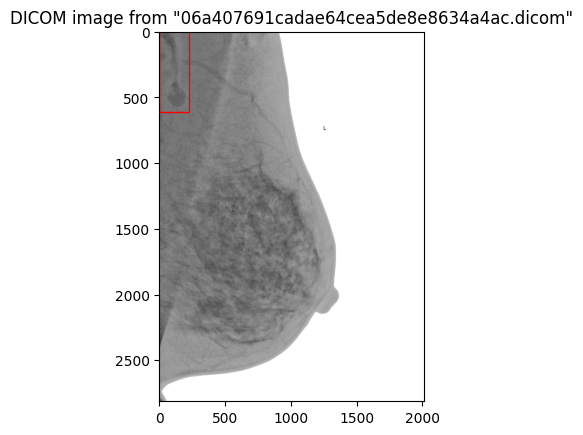

Study ID: c03090de258a9344e1c187f6a01bf275, Image ID: b723b49547d7fae7e4117db8d93a4fdf


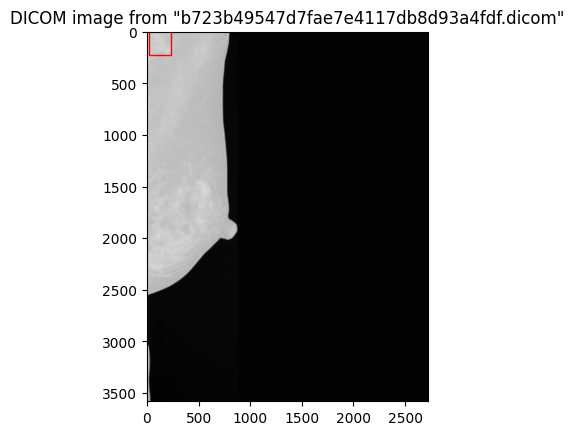

Study ID: 72eb70deeb1df7551b28c7b30b8f034c, Image ID: c8673267271111cc481f2793d94eb565


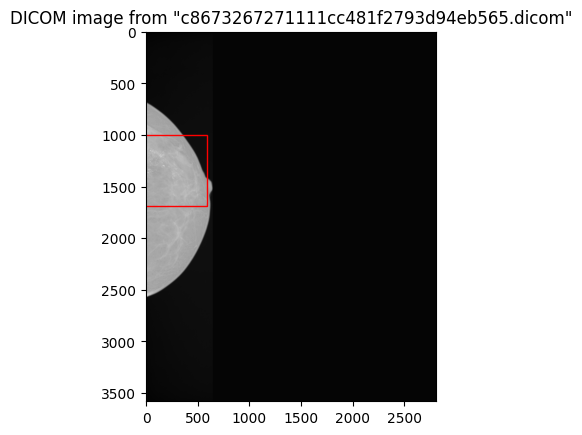

Study ID: fcfdac68cdf5c9515a810d8adf71e2cc, Image ID: dedfb81e153d26380398a5fae3e9faad


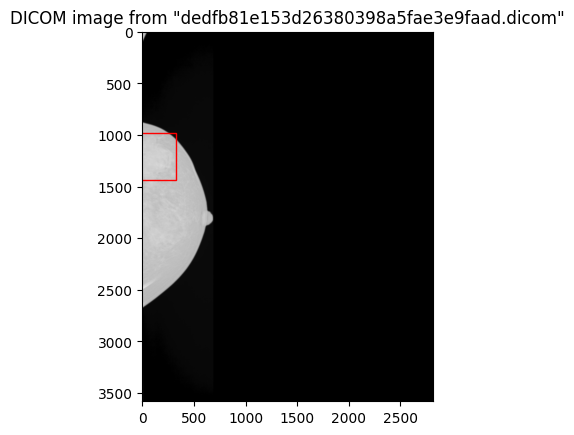

In [8]:
import zipfile
import pydicom
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the path to the ZIP file
zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'

# Function to load and display DICOM images with bounding boxes based on study_id and image_id
def load_and_display_dicom_image_with_bbox(zip_file_path, study_id, image_id, xmin, ymin, xmax, ymax):
    # Load the DICOM image from the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{study_id}/{image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Display the DICOM image with bounding box
    plt.imshow(ds.pixel_array, cmap='gray')
    plt.title(f'DICOM image from "{image_id}.dicom"')

    # Overlay bounding box on the image
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    plt.show()

# Display DICOM images with bounding boxes for each row in negative_values_df
for index, row in negative_values_df.iterrows():
    print(f"Study ID: {row['study_id']}, Image ID: {row['image_id']}")
    load_and_display_dicom_image_with_bbox(zip_file_path, row['study_id'], row['image_id'], row['xmin'], row['ymin'], row['xmax'], row['ymax'])


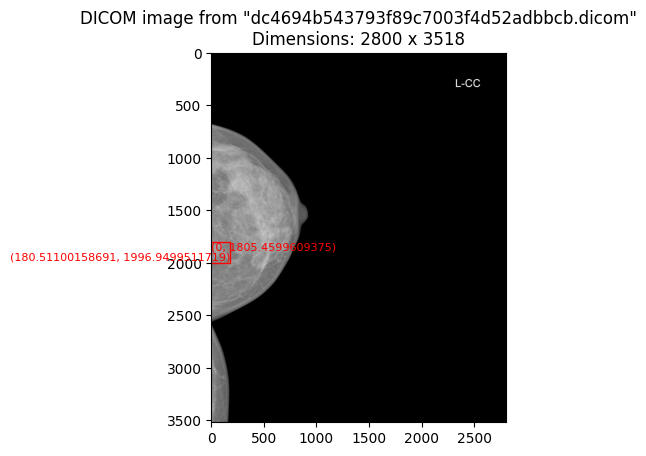

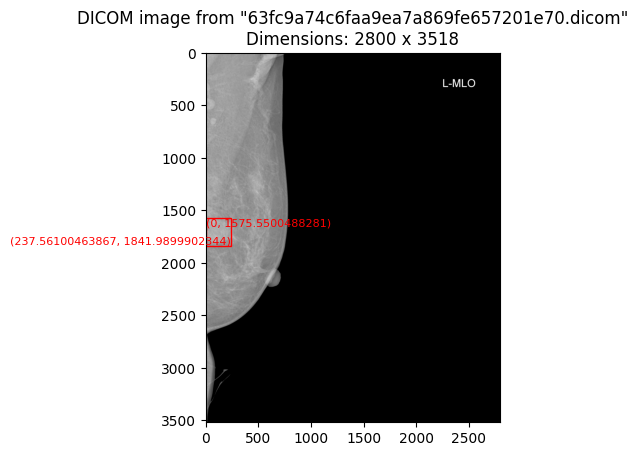

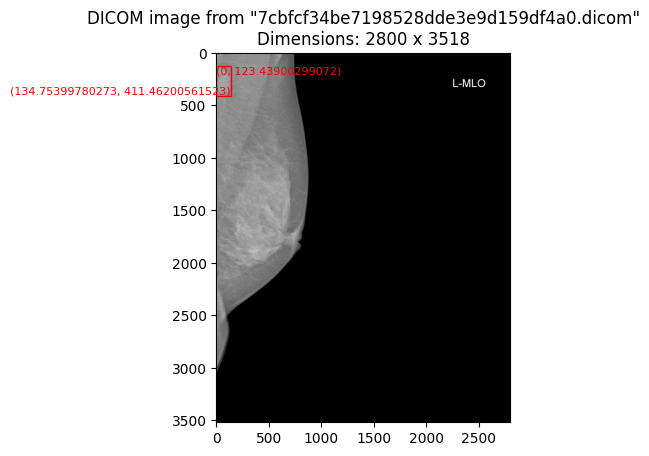

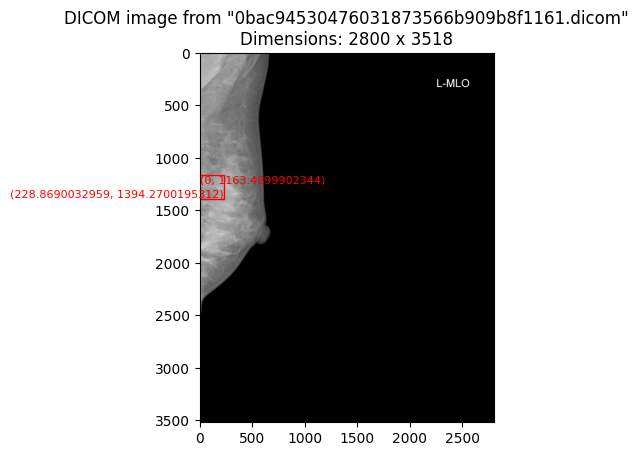

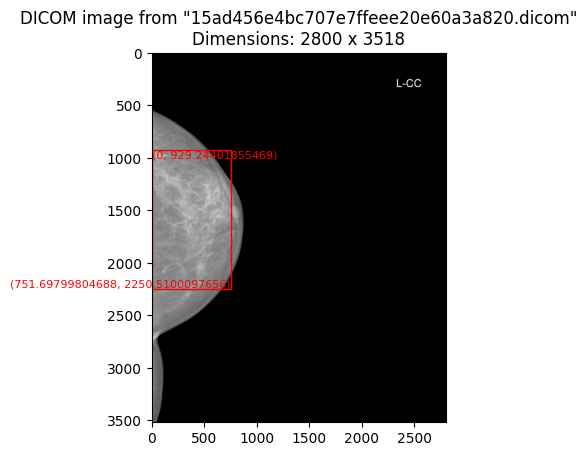

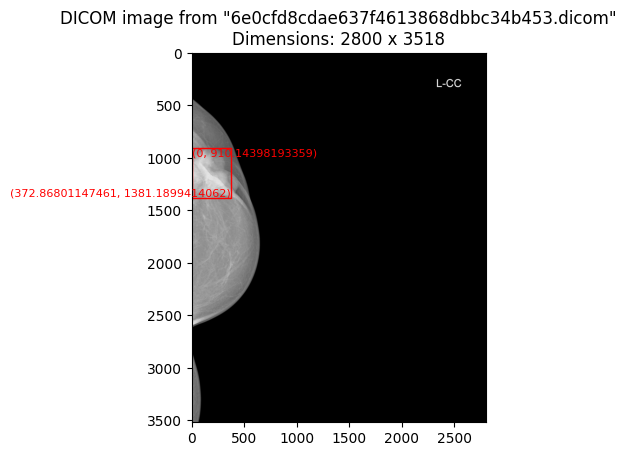

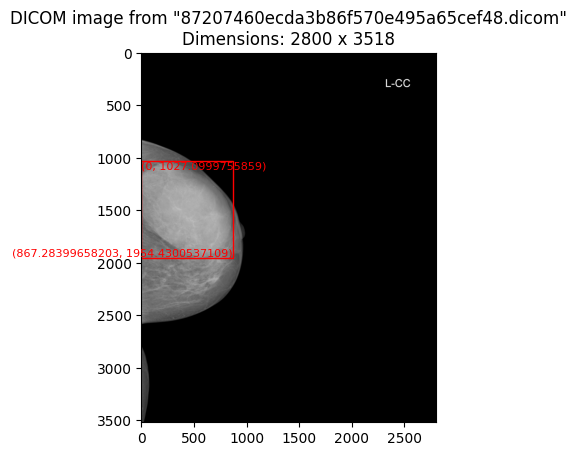

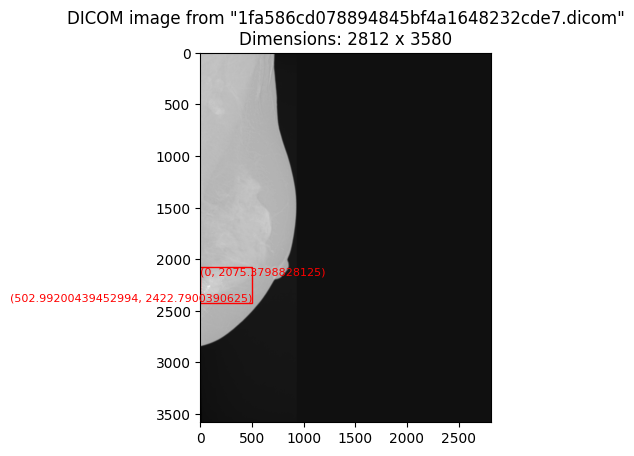

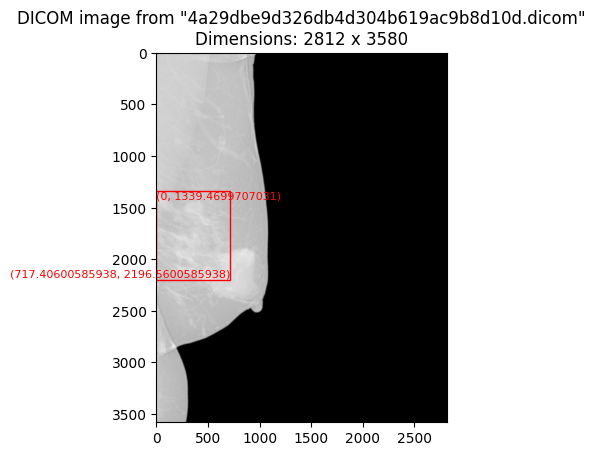

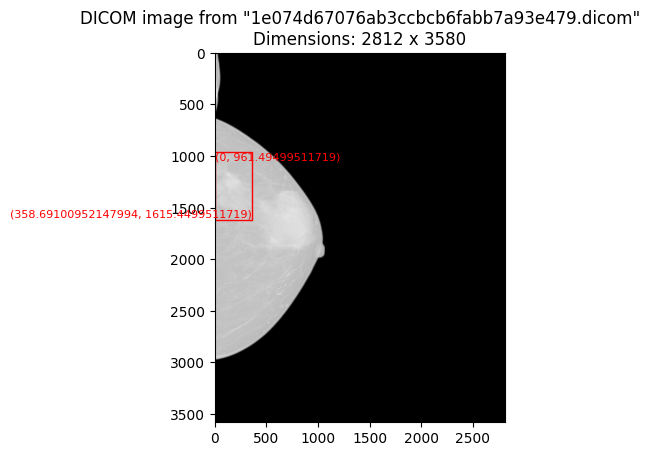

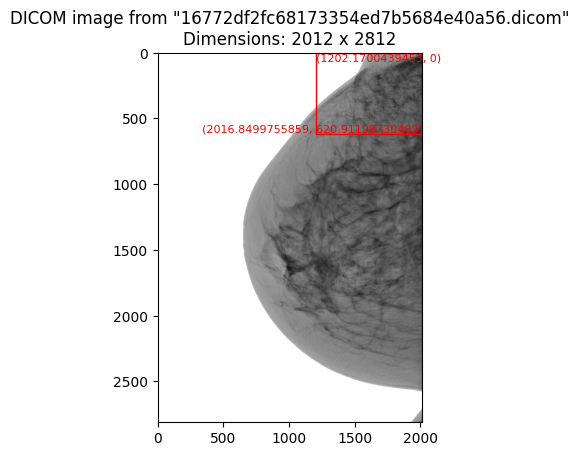

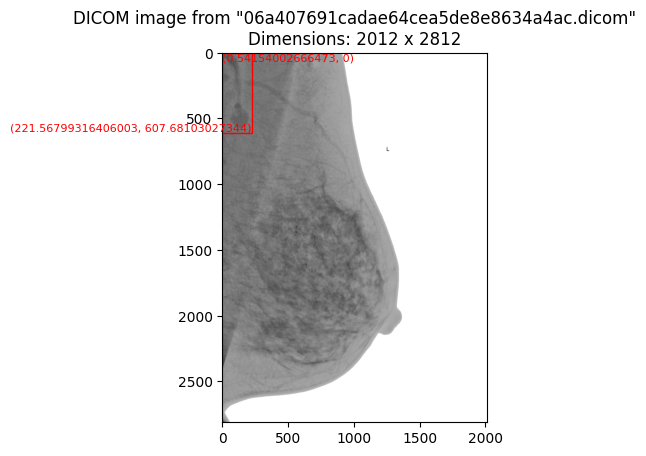

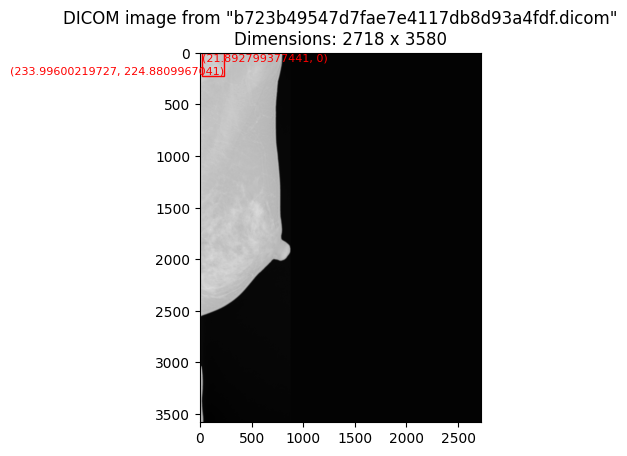

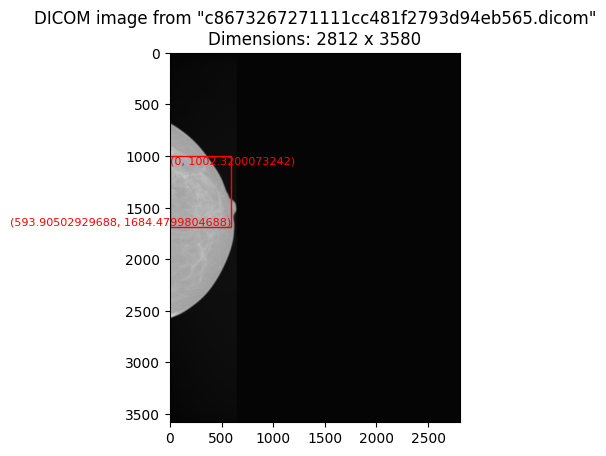

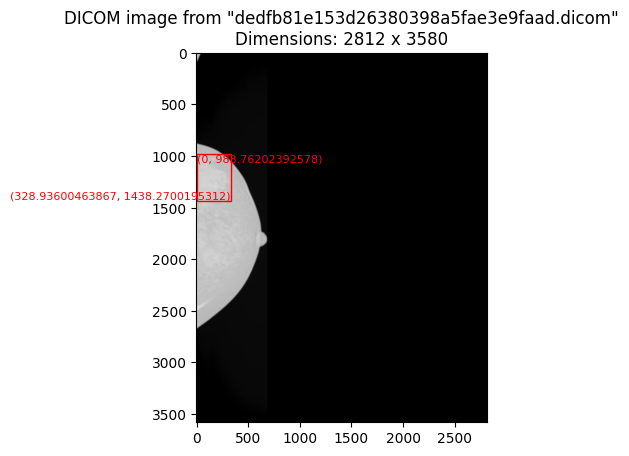

In [9]:
import zipfile
import pandas as pd
import pydicom
import matplotlib.pyplot as plt

# Define the path to the ZIP file
zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'

# Function to load DICOM images from the ZIP file based on study_id and image_id
def load_and_display_dicom_image(zip_file_path, study_id, image_id, xmin, ymin, xmax, ymax):
    # Load the DICOM image from the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{study_id}/{image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Get the dimensions (width and height) of the DICOM image
    width, height = ds.Columns, ds.Rows

    # Rectify bounding box coordinates
    xmin, ymin, xmax, ymax = max(0, xmin), max(0, ymin), max(0, xmax), max(0, ymax)

    # Display the DICOM image with rectified bounding box and coordinates
    plt.imshow(ds.pixel_array, cmap='gray')
    plt.title(f'DICOM image from "{image_id}.dicom"\nDimensions: {width} x {height}')

    # Overlay rectified bounding box on the image
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    # Display coordinates on top of the image
    plt.text(xmin, ymin, f'({xmin}, {ymin})', color='r', fontsize=8, ha='left', va='top')
    plt.text(xmax, ymax, f'({xmax}, {ymax})', color='r', fontsize=8, ha='right', va='bottom')

    plt.show()

# Assuming 'negative_values_df' contains rectified bounding box coordinates
for index, row in negative_values_df.iterrows():
    load_and_display_dicom_image(zip_file_path, row['study_id'], row['image_id'], row['xmin'], row['ymin'], row['xmax'], row['ymax'])


In [10]:
import pandas as pd

# Assuming your DataFrame is named 'data_final'
# Make a copy of the original DataFrame
corrected_data_final = data_final.copy()

# Correct negative values in 'xmin', 'xmax', 'ymin', and 'ymax'
corrected_data_final['xmin'] = corrected_data_final['xmin'].clip(lower=0)
corrected_data_final['xmax'] = corrected_data_final['xmax'].clip(lower=0)
corrected_data_final['ymin'] = corrected_data_final['ymin'].clip(lower=0)
corrected_data_final['ymax'] = corrected_data_final['ymax'].clip(lower=0)

# Check if there are still negative values
negative_values_count = (
    (corrected_data_final['xmin'] < 0).sum() +
    (corrected_data_final['xmax'] < 0).sum() +
    (corrected_data_final['ymin'] < 0).sum() +
    (corrected_data_final['ymax'] < 0).sum()
)

print("Total count of rows with negative values after correction:", negative_values_count)

# Display the study_id, image_id, xmin, xmax, ymin, and ymax of rows with negative values
negative_rows = corrected_data_final[
    (corrected_data_final['xmin'] < 0) |
    (corrected_data_final['xmax'] < 0) |
    (corrected_data_final['ymin'] < 0) |
    (corrected_data_final['ymax'] < 0)
]

print("DataFrame with rows containing negative values after correction:")
print(negative_rows[['study_id', 'image_id', 'xmin', 'xmax', 'ymin', 'ymax']])


Total count of rows with negative values after correction: 0
DataFrame with rows containing negative values after correction:
Empty DataFrame
Columns: [study_id, image_id, xmin, xmax, ymin, ymax]
Index: []


In [11]:
import pandas as pd

# Define the desired number of malignant and benign images for the new dataset
desired_malignant_count_new = 2000
desired_benign_count_new = 2000

# Create dataset_3 by sampling the desired number of malignant and benign images
dataset_3 = corrected_data_final.copy()
dataset_3['Oversampling'] = 0  # Adding the Oversampling column and setting initial values to 0

# Sample the minimum between the desired count and the available count for malignant
dataset_3_malignant = dataset_3[dataset_3['classification'] == 'Malignant'].sample(n=min(desired_malignant_count_new, dataset_3['classification'].value_counts()['Malignant']), replace=True, random_state=42)

# Set the "Oversampling" column to 1 for oversampled malignant images
dataset_3.loc[dataset_3_malignant.index, 'Oversampling'] = 1

# Calculate the remaining counts needed for malignant
remaining_malignant_count = desired_malignant_count_new - dataset_3_malignant.shape[0]

# Oversample the malignant class to reach the desired count
additional_malignant_duplicates = dataset_3[dataset_3['classification'] == 'Malignant'].sample(n=remaining_malignant_count, replace=True, random_state=42)

# Set the "Oversampling" column to 1 for additional oversampled malignant images
dataset_3.loc[additional_malignant_duplicates.index, 'Oversampling'] = 1

# Sample the desired count for benign
dataset_3_benign = dataset_3[dataset_3['classification'] == 'Benign'].sample(n=desired_benign_count_new, replace=True, random_state=42)

# Combine the selected malignant and benign cases to create the new dataset
dataset_new = pd.concat([dataset_3_malignant, additional_malignant_duplicates, dataset_3_benign])

# Display the total number of malignant and benign cases in the new dataset along with the "Oversampling" column
classification_counts_new = dataset_new['classification'].value_counts()
oversampling_counts = dataset_new['Oversampling'].value_counts()

print("New Dataset:")
print(classification_counts_new)
print("\nOversampling Counts:")
print(oversampling_counts)


New Dataset:
classification
Malignant    2000
Benign       2000
Name: count, dtype: int64

Oversampling Counts:
Oversampling
0    3432
1     568
Name: count, dtype: int64


In [12]:
dataset_new

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,classification,Oversampling
1938,a4d12ca2beaf6714f136cdb1370b84fc,564ead5f45ee3c8d48c0c2469693c5d4,54716121c39ea4f99484a063f81a719e,R,CC,2812,2012,BI-RADS 5,DENSITY B,['Mass'],BI-RADS 5,1954.810059,1160.140015,2007.560059,1441.510010,training,Malignant,0
1592,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,606.968994,1776.430054,670.799011,1872.520020,training,Malignant,0
2147,08db0293a555cc089d14e6357381d42d,8e790e6d5ca4be366352e3c120179913,0602173c47d1b21fe548b2d852433a03,L,CC,3580,2812,BI-RADS 4,DENSITY B,['Mass'],BI-RADS 4,3.695270,1139.300049,348.778992,1595.300049,training,Malignant,0
1947,f2b2d7d20e97526e1ce2e9b674d19640,ddd9c981ef06ef939bc4cb8cc38f62f7,3a13455f3c15a6fd18a163cd9f654d26,L,CC,2812,2012,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,107.112000,991.445007,467.307007,1351.930054,training,Malignant,0
1894,d9f85d334141f3554fb6faceccdff570,95a276e33dc0ab85d14a8fae6df58589,6266ffa44d75d2edc9d3c725b20b6d49,R,MLO,2812,2012,BI-RADS 5,DENSITY B,"['Suspicious Calcification', 'Mass']",BI-RADS 4,1831.589966,1935.239990,2008.739990,1998.660034,training,Malignant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,51c53a8a5656478ed2c0f2cc8bfbda99,f4dfdb08c15be8482fb70abebb123c4c,f3ecf05e0dab863794e6c4b3a141007a,L,MLO,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training,Benign,0
16651,792610d6c4044d3a4e2cfdbc5b494768,5340db74b52300f851976c706506771d,e7193389a60710962cfd9020676582d4,L,MLO,2812,2012,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,test,Benign,0
16394,eb56e5aabce6ddbeab3b5bb9790de56f,f36641edd4f17a9a03e7a6e29cb1cdb2,8eefa70e22b7c85b6b0bf01816fd90fa,R,MLO,2812,2012,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training,Benign,0
13771,6c1673b5ab22a98988e9ba8349dc9554,c626a8cc1630cdc5fecfdddb0b76da7f,506717a694ff298aa2b7b5b2f4cf1826,R,MLO,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training,Benign,0


In [13]:
import pandas as pd

# Assuming your DataFrame is named 'dataset_new'
# Make a copy of the original DataFrame
dataset_new_copy = dataset_new.copy()

# Handling NaN values in bounding box coordinates
dataset_new_copy[['xmin', 'xmax', 'ymin', 'ymax']] = dataset_new_copy[['xmin', 'xmax', 'ymin', 'ymax']].fillna(0)

# Convert bounding box coordinates to YOLO format for the copy
dataset_new_copy['yolo_x'] = (dataset_new_copy['xmin'] + dataset_new_copy['xmax']) / (2 * dataset_new_copy['width'])
dataset_new_copy['yolo_y'] = (dataset_new_copy['ymin'] + dataset_new_copy['ymax']) / (2 * dataset_new_copy['height'])
dataset_new_copy['yolo_width'] = (dataset_new_copy['xmax'] - dataset_new_copy['xmin']) / dataset_new_copy['width']
dataset_new_copy['yolo_height'] = (dataset_new_copy['ymax'] - dataset_new_copy['ymin']) / dataset_new_copy['height']

# Display the YOLO bounding box values
yolo_bbox_values = dataset_new_copy[['study_id', 'image_id', 'yolo_x', 'yolo_y', 'yolo_width', 'yolo_height']]
print("YOLO Bounding Box Values:")
print(yolo_bbox_values)


YOLO Bounding Box Values:
                               study_id                          image_id  \
1938   a4d12ca2beaf6714f136cdb1370b84fc  54716121c39ea4f99484a063f81a719e   
1592   0246c6050121c176d2e8fcf91f22f926  0dbc1663eceef924f0f339604af18364   
2147   08db0293a555cc089d14e6357381d42d  0602173c47d1b21fe548b2d852433a03   
1947   f2b2d7d20e97526e1ce2e9b674d19640  3a13455f3c15a6fd18a163cd9f654d26   
1894   d9f85d334141f3554fb6faceccdff570  6266ffa44d75d2edc9d3c725b20b6d49   
...                                 ...                               ...   
4724   51c53a8a5656478ed2c0f2cc8bfbda99  f3ecf05e0dab863794e6c4b3a141007a   
16651  792610d6c4044d3a4e2cfdbc5b494768  e7193389a60710962cfd9020676582d4   
16394  eb56e5aabce6ddbeab3b5bb9790de56f  8eefa70e22b7c85b6b0bf01816fd90fa   
13771  6c1673b5ab22a98988e9ba8349dc9554  506717a694ff298aa2b7b5b2f4cf1826   
2934   6924720c5243170edfa7e47969efdacf  6a27555ee3ea30ce56c5e026faaf73d4   

         yolo_x    yolo_y  yolo_width  yolo_heigh

In [14]:
# Check if YOLO bounding box values are exactly within the range [0, 1]
invalid_yolo_values = (
    ~dataset_new_copy['yolo_x'].between(0.0, 1.0) |
    ~dataset_new_copy['yolo_y'].between(0.0, 1.0) |
    ~dataset_new_copy['yolo_width'].between(0.0, 1.0) |
    ~dataset_new_copy['yolo_height'].between(0.0, 1.0)
)

# Display rows with invalid YOLO bounding box values
invalid_yolo_rows = dataset_new_copy[invalid_yolo_values]
print("Rows with invalid YOLO bounding box values:")
print(invalid_yolo_rows)


Rows with invalid YOLO bounding box values:
Empty DataFrame
Columns: [study_id, series_id, image_id, laterality, view_position, height, width, breast_birads, breast_density, finding_categories, finding_birads, xmin, ymin, xmax, ymax, split, classification, Oversampling, yolo_x, yolo_y, yolo_width, yolo_height]
Index: []

[0 rows x 22 columns]


In [15]:
# Check if YOLO bounding box values are within the range [0, 1] with 10 decimal points precision
decimal_points = 15
tolerance = 10**(-decimal_points)

invalid_yolo_values = (
    (dataset_new_copy['yolo_x'].round(decimal_points) < 0) & (dataset_new_copy['yolo_x'].round(decimal_points) > 1) |
    (dataset_new_copy['yolo_y'].round(decimal_points) < 0) & (dataset_new_copy['yolo_y'].round(decimal_points) > 1) |
    (dataset_new_copy['yolo_width'].round(decimal_points) < 0) & (dataset_new_copy['yolo_width'].round(decimal_points) > 1) |
    (dataset_new_copy['yolo_height'].round(decimal_points) < 0) & (dataset_new_copy['yolo_height'].round(decimal_points) > 1)
)

# Display rows with invalid YOLO bounding box values
invalid_yolo_rows = dataset_new_copy[invalid_yolo_values]
print("Rows with invalid YOLO bounding box values:")
print(invalid_yolo_rows)


Rows with invalid YOLO bounding box values:
Empty DataFrame
Columns: [study_id, series_id, image_id, laterality, view_position, height, width, breast_birads, breast_density, finding_categories, finding_birads, xmin, ymin, xmax, ymax, split, classification, Oversampling, yolo_x, yolo_y, yolo_width, yolo_height]
Index: []

[0 rows x 22 columns]


In [22]:
dataset_new_copy

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,classification,Oversampling
1938,a4d12ca2beaf6714f136cdb1370b84fc,564ead5f45ee3c8d48c0c2469693c5d4,54716121c39ea4f99484a063f81a719e,R,CC,2812,2012,BI-RADS 5,DENSITY B,['Mass'],BI-RADS 5,1954.810059,1160.140015,2007.560059,1441.510010,training,Malignant,0
1592,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,606.968994,1776.430054,670.799011,1872.520020,training,Malignant,0
2147,08db0293a555cc089d14e6357381d42d,8e790e6d5ca4be366352e3c120179913,0602173c47d1b21fe548b2d852433a03,L,CC,3580,2812,BI-RADS 4,DENSITY B,['Mass'],BI-RADS 4,3.695270,1139.300049,348.778992,1595.300049,training,Malignant,0
1947,f2b2d7d20e97526e1ce2e9b674d19640,ddd9c981ef06ef939bc4cb8cc38f62f7,3a13455f3c15a6fd18a163cd9f654d26,L,CC,2812,2012,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,107.112000,991.445007,467.307007,1351.930054,training,Malignant,0
1894,d9f85d334141f3554fb6faceccdff570,95a276e33dc0ab85d14a8fae6df58589,6266ffa44d75d2edc9d3c725b20b6d49,R,MLO,2812,2012,BI-RADS 5,DENSITY B,"['Suspicious Calcification', 'Mass']",BI-RADS 4,1831.589966,1935.239990,2008.739990,1998.660034,training,Malignant,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,51c53a8a5656478ed2c0f2cc8bfbda99,f4dfdb08c15be8482fb70abebb123c4c,f3ecf05e0dab863794e6c4b3a141007a,L,MLO,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,0.000000,0.000000,0.000000,0.000000,training,Benign,0
16651,792610d6c4044d3a4e2cfdbc5b494768,5340db74b52300f851976c706506771d,e7193389a60710962cfd9020676582d4,L,MLO,2812,2012,BI-RADS 1,DENSITY C,['No Finding'],NaN,0.000000,0.000000,0.000000,0.000000,test,Benign,0
16394,eb56e5aabce6ddbeab3b5bb9790de56f,f36641edd4f17a9a03e7a6e29cb1cdb2,8eefa70e22b7c85b6b0bf01816fd90fa,R,MLO,2812,2012,BI-RADS 1,DENSITY C,['No Finding'],NaN,0.000000,0.000000,0.000000,0.000000,training,Benign,0
13771,6c1673b5ab22a98988e9ba8349dc9554,c626a8cc1630cdc5fecfdddb0b76da7f,506717a694ff298aa2b7b5b2f4cf1826,R,MLO,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,0.000000,0.000000,0.000000,0.000000,training,Benign,0


In [49]:
import os
import zipfile
import pydicom
import cv2
import albumentations
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys  # Import the sys module

# Define the path to the ZIP file
zip_file_path = 'D:\\Python files\\yolo_breast_cancer\\vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0.zip'

# Define a function to load and transform DICOM images from the ZIP file to PNG with CLAHE
def load_and_transform_dicom_image(zip_file_path, study_id, image_id, output_image_dir, output_label_dir, original_bounding_boxes):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{study_id}/{image_id}.dicom') as file:
                ds = pydicom.dcmread(file)

        # Normalize pixel values to 8-bit range while keeping the black background
        pixel_data = ds.pixel_array
        min_pixel_value = pixel_data.min()
        max_pixel_value = pixel_data.max()

        # Normalize the pixel values
        pixel_data = ((pixel_data - min_pixel_value) / (max_pixel_value - min_pixel_value) * 255).astype(int)

        # Convert pixel_data to 8-bit unsigned char
        pixel_data = cv2.convertScaleAbs(pixel_data)
        
        # Convert to Grayscale
        pixel_data = cv2.cvtColor(pixel_data, cv2.COLOR_BGR2GRAY) if len(pixel_data.shape) == 3 else pixel_data
        
        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        pixel_data = clahe.apply(pixel_data)

        # Adjust bounding box coordinates
        for i in range(len(original_bounding_boxes)):
            bbox_list = list(original_bounding_boxes[i])
            bbox_list[2] = np.abs(bbox_list[2] - 0.5 / pixel_data.shape[0])
            bbox_list[3] = np.abs(bbox_list[3] - 0.5 / pixel_data.shape[1])
            original_bounding_boxes[i] = tuple(bbox_list)

        # Define the transformation pipeline for resizing to 640x640
        transform = albumentations.Compose([
            albumentations.Resize(height=640, width=640, always_apply=True),
        ], bbox_params={'format': 'pascal_voc'})

        # Apply the transformation
        transformed = transform(image=pixel_data, bboxes=np.array(original_bounding_boxes, dtype=np.float32))

        # Get the transformed bounding box details
        transformed_bboxes = transformed["bboxes"]

        study_id = row['study_id']
        image_id = row['image_id']
        classification = row['classification']
        oversampling = row['Oversampling']

        # Display the study ID, image ID, and YOLO coordinates
        print(f"Study ID: {study_id}, Image ID: {image_id}, Classification: {classification}, Oversampling: {oversampling}")
        for bbox in transformed_bboxes:
            yolo_format = convert_to_yolo_format(640, 640, bbox)  # Since the image is resized to 640x640
            print(f"YOLO Coordinates: {yolo_format}")

        image_file_name = f'{oversampling}_{classification}_{study_id}_{image_id}.png'
        bbox_file_name = f'{oversampling}_{classification}_{study_id}_{image_id}.txt'

        image_file_path = os.path.join(output_image_dir, image_file_name)
        bbox_file_path = os.path.join(output_label_dir, bbox_file_name)

        # Save the transformed image as PNG
        cv2.imwrite(image_file_path, pixel_data)

        # Save bounding box details to a text file in YOLO format
        with open(bbox_file_path, 'w') as bbox_file:
            for bbox in transformed_bboxes:
                yolo_format = convert_to_yolo_format(640, 640, bbox)  # Since the image is resized to 640x640
                bbox_file.write(yolo_format + "\n")

    except ValueError as ve:
        print(f"Error processing Study ID: {study_id}, Image ID: {image_id}")
        print(f"Error message: {ve}")
        return (study_id, image_id)  # Return the problematic study_id and image_id pair

    return None  # Return None if processing is successful


def display_image_with_bboxes(image, bboxes):
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for bbox in bboxes:
        x_min, y_min, x_max, y_max, class_label = bbox
        # Calculate the width and height of the bounding box
        width = x_max - x_min
        height = y_max - y_min
        # Create a rectangle patch
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor='g', facecolor='none'
        )
        # Add the rectangle to the axis
        ax.add_patch(rect)
    # Set axisproperties
    ax.set_axis_off()
    # Display the image with bounding boxes using Matplotlib
    plt.title(f'DICOM image from "{study_id}_{image_id}.dicom"\n{x_min} {y_min} {width} {height}')
    plt.show()


def convert_to_yolo_format(image_width, image_height, bbox):
    x_min, y_min, x_max, y_max, class_label = bbox

    # Calculate center coordinates and dimensions
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min

    # Normalize to image dimensions
    center_x /= image_width
    center_y /= image_height
    width /= image_width
    height /= image_height

    return f"{class_label} {center_x} {center_y} {width} {height}"


# List to store study_id and image_id pairs for images with ValueError
error_images = []

for _, row in dataset_new.iterrows():
    study_id = row['study_id']
    image_id = row['image_id']
    if row['classification'] == 'Malignant':
        class_label = 1
    else:
        class_label = 0 

    x_min = row['xmin']
    y_min = row['ymin']
    x_max = row['xmax']
    y_max = row['ymax']
    image_width = row['width']
    image_height = row['height']

    if isnan(x_min) or isnan(x_max) or isnan(y_min) or isnan(y_max):
        x_min, y_min, x_max, y_max = 0, 0, image_width, image_height

    original_bounding_boxes = [(x_min, y_min, x_max, y_max, class_label)]

    output_image_directory = 'D:\Python files\yolo_breast_cancer\dataset_new_images'
    output_label_directory = 'D:\Python files\yolo_breast_cancer\dataset_new_labels'
    os.makedirs(output_image_directory, exist_ok=True)
    os.makedirs(output_label_directory, exist_ok=True)

    # Attempt to process the image, catch ValueError, and store in error_images list
    result = load_and_transform_dicom_image(zip_file_path, study_id, image_id, output_image_directory, output_label_directory, original_bounding_boxes)
    if result is not None:
        error_images.append(result)

# Print study_id and image_id pairs for images with ValueError
print("Study ID and Image ID pairs for images with ValueError:", error_images)


Study ID: a4d12ca2beaf6714f136cdb1370b84fc, Image ID: 54716121c39ea4f99484a063f81a719e, Classification: Malignant, Oversampling: 0
YOLO Coordinates: 1.0 0.9846843924247484 0.462597756094139 0.026217633165848752 0.10006036663462395
Study ID: 0246c6050121c176d2e8fcf91f22f926, Image ID: 0dbc1663eceef924f0f339604af18364, Classification: Malignant, Oversampling: 0
YOLO Coordinates: 1.0 0.22719912576471923 0.5096298814485859 0.022699109181910114 0.02684073847765367
Study ID: 08db0293a555cc089d14e6357381d42d, Image ID: 0602173c47d1b21fe548b2d852433a03, Classification: Malignant, Oversampling: 0
YOLO Coordinates: 1.0 0.06267320575619151 0.3819273708918907 0.12271819667490584 0.12737426757812492
Study ID: f2b2d7d20e97526e1ce2e9b674d19640, Image ID: 3a13455f3c15a6fd18a163cd9f654d26, Classification: Malignant, Oversampling: 0
YOLO Coordinates: 1.0 0.142748216511478 0.4166740428333092 0.17902327247452784 0.1281951643833903
Study ID: d9f85d334141f3554fb6faceccdff570, Image ID: 6266ffa44d75d2edc9d3c

In [54]:
error_images

[('ae4b6f49514c32216a8aabb4b3ad026a', '16772df2fc68173354ed7b5684e40a56'),
 ('ae4b6f49514c32216a8aabb4b3ad026a', '16772df2fc68173354ed7b5684e40a56'),
 ('f9b9d3c214c10fa252823cd4aaab269e', '1cbc0ae5d67abccd58a4ba6d657d921e'),
 ('b1f3e2065ae5087a53243e0b0729273b', '343605cd7da7f2515b76d13c3e49e709'),
 ('188998c43ceb69d4cf4da4eba2c53b74', 'dc60a7e10efddef70dd265cb3b82c74b'),
 ('48ac6ea5fc55dcc8dc9175975e00b86c', 'c75a3c11d13ff3f199ff4c443be6e56f'),
 ('1560345de7d8277b170ca3842eae6c97', '225863035d1c03f3c1cd49f409870fde'),
 ('ecf23dfece05e009f4bbdd8fc386efde', 'e9f60c6702fa4dfe424362daa1b95e46'),
 ('1560345de7d8277b170ca3842eae6c97', '225863035d1c03f3c1cd49f409870fde'),
 ('48ac6ea5fc55dcc8dc9175975e00b86c', 'c75a3c11d13ff3f199ff4c443be6e56f'),
 ('48ac6ea5fc55dcc8dc9175975e00b86c', 'c75a3c11d13ff3f199ff4c443be6e56f'),
 ('f9b9d3c214c10fa252823cd4aaab269e', '6b6b65d46cf68b3673b9a59c4cce9fc8'),
 ('bb307884bfe5da3db54b94b736f10023', 'f8b75219cf050a795846c2772fad3e94'),
 ('1560345de7d8277b170ca3

In [55]:
len(error_images)

20

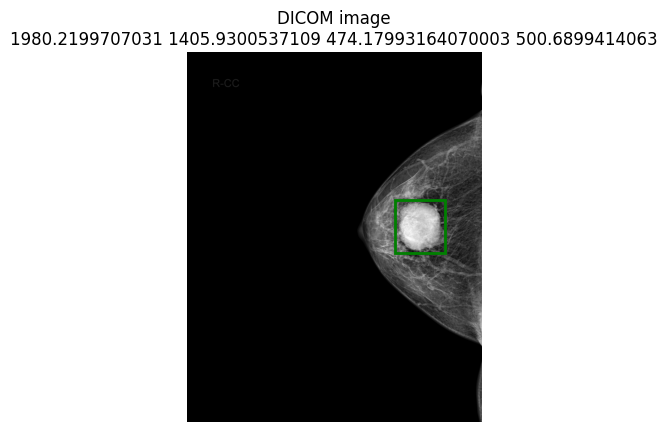

In [141]:
import os
import zipfile
import pydicom
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

def display_image_with_bboxes(image, bboxes):
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')  # Specify 'gray' colormap for grayscale image
    for bbox in bboxes:
        x_min, y_min, x_max, y_max, class_label = bbox
        # Calculate the width and height of the bounding box
        width = x_max - x_min
        height = y_max - y_min
        # Create a rectangle patch
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor='g', facecolor='none'
        )
        # Add the rectangle to the axis
        ax.add_patch(rect)
    # Set axis properties
    ax.set_axis_off()
    # Display the image with bounding boxes using Matplotlib
    plt.title(f'DICOM image\n{x_min} {y_min} {width} {height}')
    plt.show()

# Replace 'your_study_id' and 'your_image_id' with the specific study ID and image ID you want to display
specific_study_id = 'c0ea43e5ccc3cfefde1cb6d76bd82b3e'
specific_image_id = '66d5d94402456f664753ec443d077bf9'

# Assuming 'data_final' is your DataFrame containing bounding box details
bbox_data = data_final[(data_final['study_id'] == specific_study_id) & (data_final['image_id'] == specific_image_id)]

# Check if there are any records for the specified study and image ID
if not bbox_data.empty:
    # Get pixel data from DICOM file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{specific_study_id}/{specific_image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Extract pixel data from DICOM file
    pixel_data = ds.pixel_array

    # Convert to grayscale
    pixel_data = cv2.cvtColor(pixel_data, cv2.COLOR_BGR2GRAY) if len(pixel_data.shape) == 3 else pixel_data

    # Apply CLAHE twice
    clahe1 = cv2.createCLAHE(clipLimit=30.0, tileGridSize=(10, 10))
    pixel_data = clahe1.apply(pixel_data)

    # Extract bounding box details from the DataFrame
    bboxes = bbox_data[['xmin', 'ymin', 'xmax', 'ymax', 'classification']].values.tolist()

    # Display the image with bounding boxes
    display_image_with_bboxes(pixel_data, bboxes)
else:
    print(f"No records found for Study ID: {specific_study_id}, Image ID: {specific_image_id}")


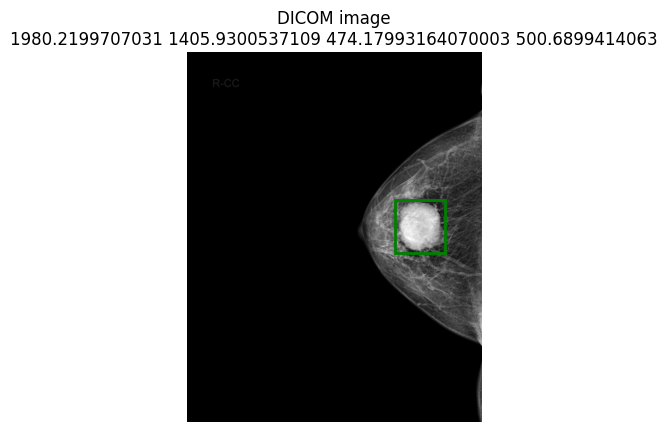

In [145]:
import os
import zipfile
import pydicom
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

def display_image_with_bboxes(image, bboxes):
    # Create a figure and axis
    fig, ax = plt.subplots(1)
    ax.imshow(image, cmap='gray')  # Specify 'gray' colormap for grayscale image
    for bbox in bboxes:
        x_min, y_min, x_max, y_max, class_label = bbox
        # Calculate the width and height of the bounding box
        width = x_max - x_min
        height = y_max - y_min
        # Create a rectangle patch
        rect = patches.Rectangle(
            (x_min, y_min), width, height, linewidth=2, edgecolor='g', facecolor='none'
        )
        # Add the rectangle to the axis
        ax.add_patch(rect)
    # Set axis properties
    ax.set_axis_off()
    # Display the image with bounding boxes using Matplotlib
    plt.title(f'DICOM image\n{x_min} {y_min} {width} {height}')
    plt.show()

# Replace 'your_study_id' and 'your_image_id' with the specific study ID and image ID you want to display
specific_study_id = 'c0ea43e5ccc3cfefde1cb6d76bd82b3e'
specific_image_id = '66d5d94402456f664753ec443d077bf9'

# Assuming 'data_final' is your DataFrame containing bounding box details
bbox_data = data_final[(data_final['study_id'] == specific_study_id) & (data_final['image_id'] == specific_image_id)]

# Check if there are any records for the specified study and image ID
if not bbox_data.empty:
    # Get pixel data from DICOM file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{specific_study_id}/{specific_image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Extract pixel data from DICOM file
    pixel_data = ds.pixel_array

    # Convert to grayscale
    pixel_data = cv2.cvtColor(pixel_data, cv2.COLOR_BGR2GRAY) if len(pixel_data.shape) == 3 else pixel_data

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=30.0, tileGridSize=(10, 10))
    pixel_data = clahe.apply(pixel_data)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(pixel_data, (5, 5), 5)

    # Extract bounding box details from the DataFrame
    bboxes = bbox_data[['xmin', 'ymin', 'xmax', 'ymax', 'classification']].values.tolist()

    # Display the image with bounding boxes
    display_image_with_bboxes(blurred_image, bboxes)
else:
    print(f"No records found for Study ID: {specific_study_id}, Image ID: {specific_image_id}")


In [125]:
import os
import zipfile
import pydicom
import cv2
import matplotlib.pyplot as plt

def save_image(image, output_path):
    # Save the original image without any filters or enhancements
    plt.imsave(output_path, image, cmap='gray')

# Replace 'your_study_id' and 'your_image_id' with the specific study ID and image ID you want to display
specific_study_id = 'aba909f14c21dc68e13e516c8a8cbb7e'
specific_image_id = 'f48421c66df7a8d198f64022fbc6b5c8'

# Output path for saving the original image without any filters
output_image_path = 'D:\Python files\yolo_breast_cancer\image_test_original.png'

# Assuming 'data_final' is your DataFrame containing bounding box details
bbox_data = data_final[(data_final['study_id'] == specific_study_id) & (data_final['image_id'] == specific_image_id)]

# Check if there are any records for the specified study and image ID
if not bbox_data.empty:
    # Get pixel data from DICOM file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(f'vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/images/{specific_study_id}/{specific_image_id}.dicom') as file:
            ds = pydicom.dcmread(file)

    # Extract pixel data from DICOM file
    pixel_data = ds.pixel_array
    
    # Save the original image without any filters or enhancements
    save_image(pixel_data, output_image_path)
else:
    print(f"No records found for Study ID: {specific_study_id}, Image ID: {specific_image_id}")


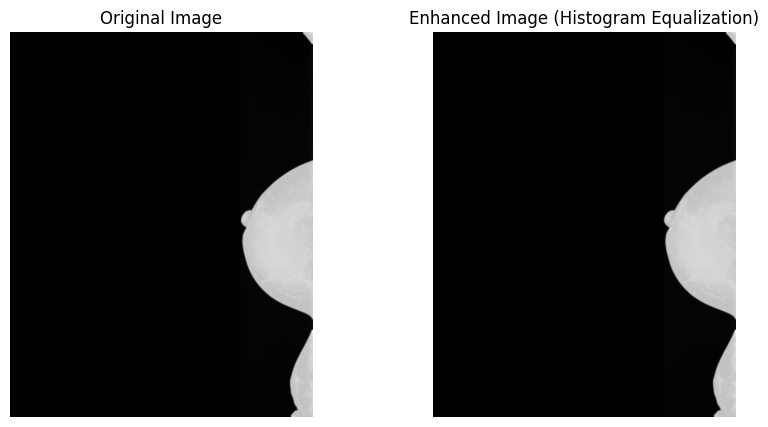

In [128]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r'D:\Python files\yolo_breast_cancer\image_test_original.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is not None:
    # Apply histogram equalization
    enhanced_image = cv2.equalizeHist(image)

    # Display the images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.title('Enhanced Image (Histogram Equalization)')
    plt.axis('off')

    plt.show()
else:
    print(f"Failed to load the image from {image_path}. Please check the file path.")


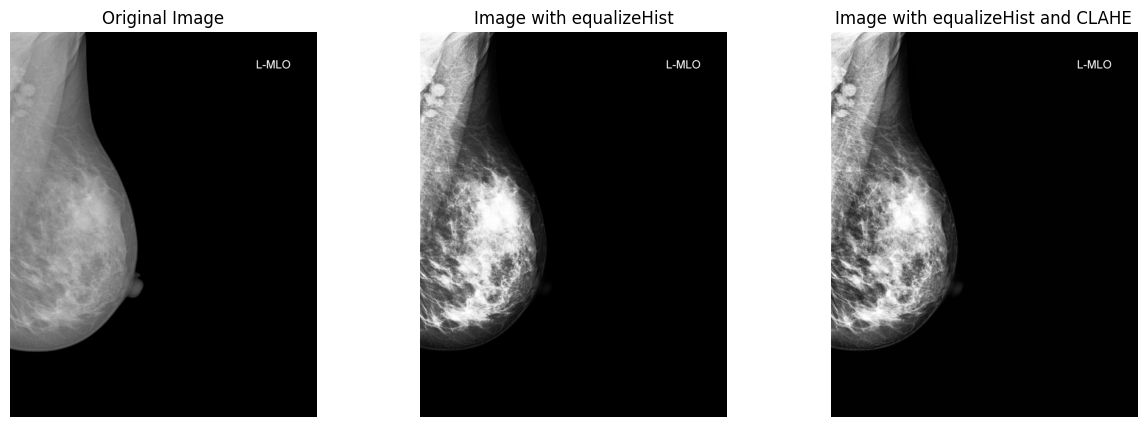

In [87]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r'D:\Python files\yolo_breast_cancer\output_rotation\output.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is not None:
    # Apply equalizeHist for image enhancement
    enhanced_image = cv2.equalizeHist(image)

    # Apply CLAHE for additional enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_clahe_image = clahe.apply(enhanced_image)

    # Display the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Image with equalizeHist')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(enhanced_clahe_image, cmap='gray')
    plt.title('Image with equalizeHist and CLAHE')
    plt.axis('off')

    plt.show()
else:
    print(f"Failed to load the image from {image_path}. Please check the file path.")


In [58]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Replace these paths with your actual image and annotation directories
image_dir = "D:\Python files\yolo_breast_cancer\dataset_new_images"
annotation_dir = "D:\Python files\yolo_breast_cancer\dataset_new_labels"

# Read images and annotations
images = [os.path.join(image_dir, x) for x in os.listdir(image_dir) if x.endswith(".png")]
annotations = [os.path.join(annotation_dir, x) for x in os.listdir(annotation_dir) if x.endswith(".txt")]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size=0.2, random_state=1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size=0.5, random_state=1)

In [59]:
import os

# Define the paths to create
directories_to_create = [
    'images/train',
    'images/val',
    'images/test',
    'labels/train',
    'labels/val',
    'labels/test'
]

# Create directories if they don't exist
for directory in directories_to_create:
    os.makedirs(directory, exist_ok=True)

# Now you have created the required directories for train, val, and test splits.

In [60]:
# Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            # Create the destination folder if it doesn't exist
            os.makedirs(destination_folder, exist_ok=True)
            shutil.move(f, destination_folder)
        except Exception as e:
            print(f"Error moving {f} to {destination_folder}: {e}")
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val')
move_files_to_folder(test_images, 'images/test')
move_files_to_folder(train_annotations, 'labels/train')
move_files_to_folder(val_annotations, 'labels/val')
move_files_to_folder(test_annotations, 'labels/test')


In [61]:
import os

def count_images_in_folder(folder_path):
    benign_count = 0
    malignant_count = 0

    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            # Check if the image is benign or malignant based on the directory name
            if 'Benign' in filename:
                benign_count += 1
            elif 'Malignant' in filename:
                malignant_count += 1

    return benign_count, malignant_count

# Define the paths to your image folders
train_folder = 'D:\\Python files\\yolo_breast_cancer\\images\\train'
val_folder = 'D:\\Python files\\yolo_breast_cancer\\images\\val'
test_folder = 'D:\\Python files\\yolo_breast_cancer\\images\\test'

train_benign_count, train_malignant_count = count_images_in_folder(train_folder)
val_benign_count, val_malignant_count = count_images_in_folder(val_folder)
test_benign_count, test_malignant_count = count_images_in_folder(test_folder)

print(f"Train - Benign: {train_benign_count}, Malignant: {train_malignant_count}")
print(f"Validation - Benign: {val_benign_count}, Malignant: {val_malignant_count}")
print(f"Test - Benign: {test_benign_count}, Malignant: {test_malignant_count}")


Train - Benign: 1487, Malignant: 899
Validation - Benign: 193, Malignant: 105
Test - Benign: 197, Malignant: 102
